## 기본 실습

**정면** 얼굴을 탐지하여 스티커를 부착

In [218]:
# 필요한 패키지 import 하기
import cv2  # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt  # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np  # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib  # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리

### 이미지 불러오기

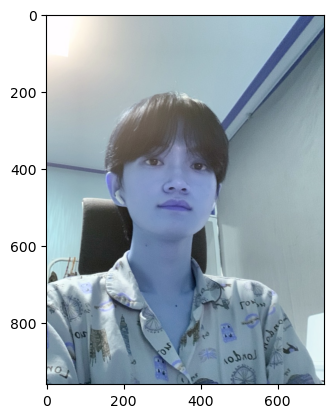

In [219]:
img_bgr = cv2.imread("image/me.jpg")  # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()  # 출력용 이미지를 따로 보관합니다
plt.imshow(
    img_bgr
)  # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show()  # 이미지를 출력해준다. (실제 출력)

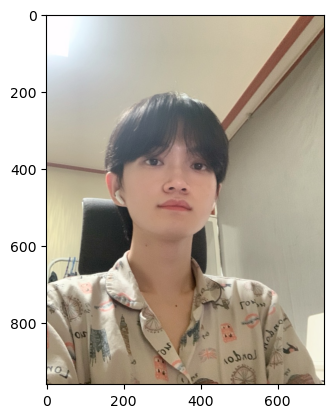

In [220]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(
    img_rgb
)  # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show()  # 이미지 실제 출력

### 얼굴 찾기

In [221]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()  # 기본 얼굴 감지기를 반환

In [222]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  # (image, num of image pyramid)

rectangles[[(200, 290) (468, 558)]]


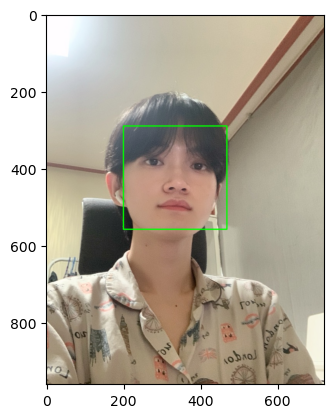

In [223]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects:  # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()  # 왼쪽
    t = dlib_rect.top()  # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom()  # 아래쪽

    cv2.rectangle(
        img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA
    )  # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 얼굴 랜드마크 찾기

In [224]:
model_path = "model/shape_predictor_68_face_landmarks.dat"
# 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
# landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
# dlib.rectangle: 내부를 예측하는 박스
# dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [225]:
list_landmarks = []
# 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
    # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
# 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
# 각 원소는 68개의 랜드마크 위치가 나열된 list
# list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


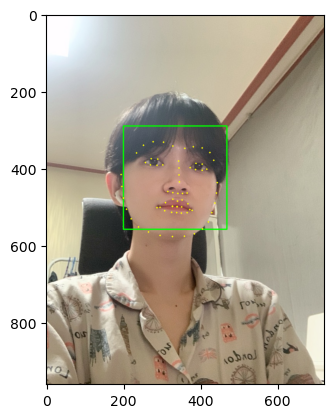

In [226]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        # cv2.circle: OpenCV의 원을 그리는 함수
        # img_show 이미지 위 각각의 point에
        # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
        # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# RGB 이미지로 전환
plt.imshow(img_show_rgb)
# 이미지를 준비
plt.show()
# 이미지를 출력

### 스티커 적용하기

In [227]:
# 코 위치
list_landmarks[0][30]

(345, 435)

In [228]:
dlib_rects[0].height()

269

In [229]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(200, 290) (468, 558)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(
    dlib_rects, list_landmarks
):  # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print(landmark[30])  # 코의 index는 30 입니다
    x = landmark[30][0]  # 이미지에서 코 부위의 x값
    y = (
        landmark[30][1] - dlib_rect.height() // 2
    )  # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (345, 435-(269//2))
    w = h = (
        dlib_rect.width()
    )  # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print(f"(x,y) : ({x},{y})")
    print(f"(w,h) : ({w},{h})")

(345, 435)
(x,y) : (345,301)
(w,h) : (269,269)


In [230]:
sticker_path = "image/cat.png"  # 왕관 이미지의 경로
img_sticker = cv2.imread(
    sticker_path
)  # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(
    img_sticker, (int(w * 1.2), int(h * 1.2))
)  # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(269) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print(img_sticker.shape)  # 사이즈를 조정한 왕관 이미지의 차원 확인

(322, 322, 3)


In [231]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# 이미지 사이즈를 키워서 w,h 기준이 아닌 키운 이미지를 기준으로 정렬
refined_x = x - img_sticker.shape[0] // 2
# refined_y = y - h
refined_y = y  # 고양이 코가 사람 코를 가려야해서 조금 내림
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print(f"(x,y) : ({refined_x},{refined_y})")
# 만약 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (184,301)


In [232]:
# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print(f"(x,y) : ({refined_x},{refined_y})")

(x,y) : (184,301)


In [233]:
img_sticker.shape

(322, 322, 3)

In [234]:
crown = cv2.imread("image/crown.png")

In [235]:
crown[0][0]

array([0, 0, 0], dtype=uint8)

In [236]:
img_sticker[0][0]

array([255, 255, 255], dtype=uint8)

In [237]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_show[
    refined_y : refined_y + img_sticker.shape[0],
    refined_x : refined_x + img_sticker.shape[1],
]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.

# 고양이 수염의 경우 왕관과 반대로 빈 곳이 255임
img_show[
    refined_y : refined_y + img_sticker.shape[0],
    refined_x : refined_x + img_sticker.shape[1],
] = np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

In [238]:
sticker_area.shape

(322, 322, 3)

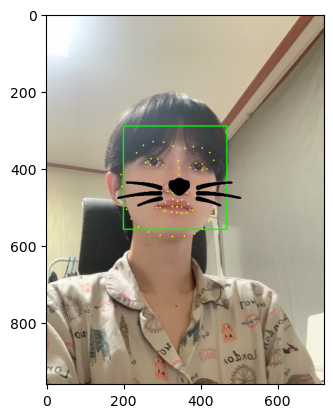

In [239]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

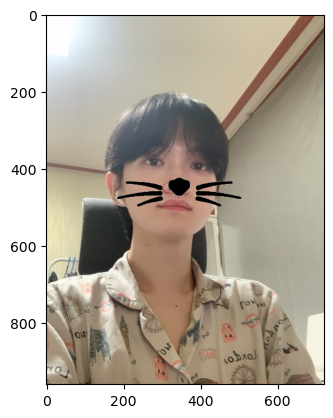

In [241]:
# 이미지
sticker_area = img_bgr[
    refined_y : refined_y + img_sticker.shape[0],
    refined_x : refined_x + img_sticker.shape[1],
]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다.
img_bgr[
    refined_y : refined_y + img_sticker.shape[0],
    refined_x : refined_x + img_sticker.shape[1],
] = np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)
plt.imshow(
    cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
)  # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

## 다양한 사진에 적용

정면이 아닌 측면과 low/high angle일 때, 얼굴의 일부분이 가려졌을 때를 비교

얼굴을 탐지하지 못하거나, 얼굴은 찾아도 랜드마크를 못찾는지를 확인할 수 있게 함

In [266]:
# 함수
def sticker(image_path):
    # 이미지 불러오기
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # 얼굴을 찾기위한 detector를 선언
    detector_hog = dlib.get_frontal_face_detector()
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)  # (image, num of image pyramid)
    if not dlib_rects:
        print("얼굴 탐지 실패")
        return

    # 랜드마크 찾기
    model_path = "model/shape_predictor_68_face_landmarks.dat"
    landmark_predictor = dlib.shape_predictor(model_path)
    list_landmarks = []  # 랜드마크의 위치를 저장할 list 생성

    # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
    # face landmark 좌표를 저장해둡니다
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        list_landmarks.append(list_points)
    if not list_landmarks:
        print("랜드마크 탐지 실패")
        return

    # 스티커를 붙일 좌표 찾기
    for dlib_rect, landmark in zip(
        dlib_rects, list_landmarks
    ):  # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
        x = landmark[30][0]  # 이미지에서 코 부위의 x값
        y = (
            landmark[30][1] - dlib_rect.height() // 2
        )  # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (345, 435-(269//2))
        w = h = dlib_rect.width()

    # 스티커 불러오기
    sticker_path = "image/cat.png"  # 이미지의 경로
    img_sticker = cv2.imread(
        sticker_path
    )  # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
    img_sticker = cv2.resize(
        img_sticker, (int(w * 1.2), int(h * 1.2))
    )  # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(269) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))

    # x,y,w,h 모두 위에서 반복문 안에서 지정
    # 이미지 사이즈를 키워서 w,h 기준이 아닌 키운 이미지를 기준으로 정렬
    refined_x = x - img_sticker.shape[0] // 2
    refined_y = y
    # 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
    # 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨

    # if 음수 : 이미지 범위를 벗어남
    # opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.
    if refined_x < 0:
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0
    # 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]
        refined_y = 0

    # 이미지
    sticker_area = img_bgr[
        refined_y : refined_y + img_sticker.shape[0],
        refined_x : refined_x + img_sticker.shape[1],
    ]
    # img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다.
    img_bgr[
        refined_y : refined_y + img_sticker.shape[0],
        refined_x : refined_x + img_sticker.shape[1],
    ] = np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)
    plt.imshow(
        cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    )  # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
    plt.show()

In [271]:
def img_show(path):
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

### 약간 옆모습

두 눈 중 하나만 보이는 완전한 측면사진은 당연히 얼굴인식이 안될것으로 생각하여 눈이 보이는 최대한의 각도의 사진을 사용

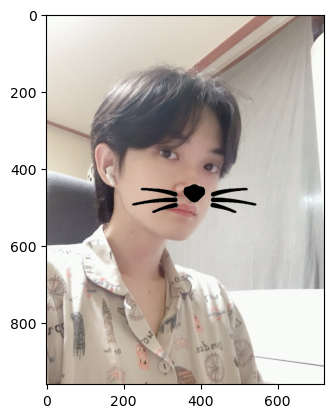

In [267]:
sticker("image/me_side.jpg")

### low angle (아래에서 위를 봤을 때)

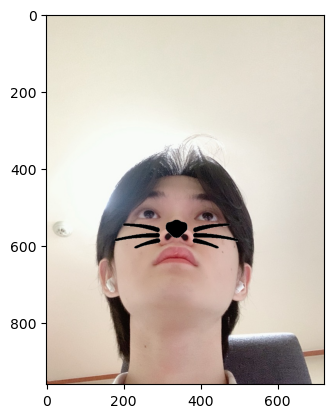

In [250]:
sticker("image/me_low.jpg")

### high angle (위에서 아래로)

**얼굴 탐지를 실패함**

사람의 눈으로는 눈, 코, 입을 다 볼 수 있는데, 머리가 눈을 가려서 못 찾은 것으로 추정?

In [268]:
sticker("image/me_high.jpg")

얼굴 탐지 실패


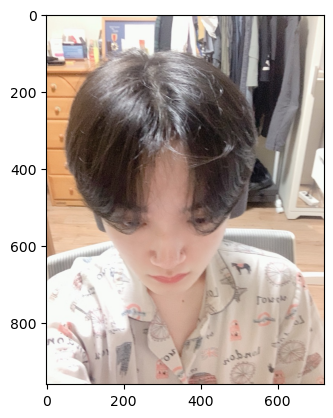

In [272]:
img_show("image/me_high.jpg")

### 얼굴 반쪽 가릴 때
눈 하나를 가리면 얼굴 탐지를 실패함

In [270]:
sticker("image/me_hided.jpg")

얼굴 탐지 실패


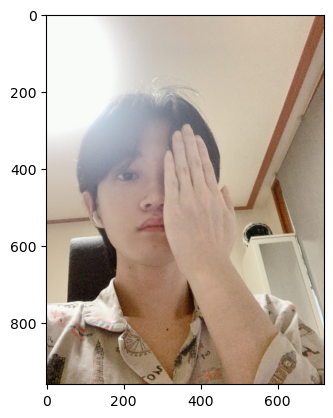

In [273]:
img_show("image/me_hided.jpg")

### 눈을 조금 가렸을 때
예상 외로 눈의 절반 정도를 가려도 얼굴을 찾을 수 있음

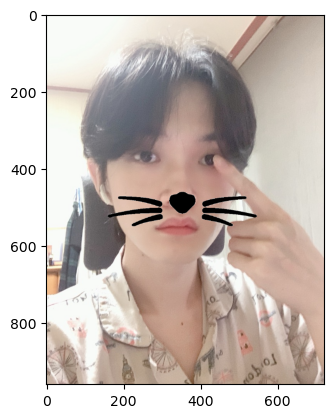

In [274]:
sticker("image/me_hided_2.jpg")

### 눈 하나를 전부 가렸을 때
눈 하나를 완전히 가려도 얼굴을 찾을 수 있음

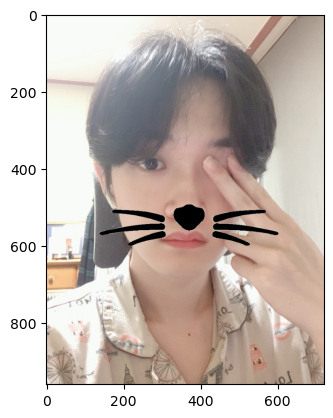

In [276]:
sticker("image/me_hided_3.jpg")

### 눈이 안보이는 측면

옆모습 사진을 실험할 때 두 눈이 보여야 한다고 가정했지만, 하나의 눈을 가려도 얼굴을 찾아서 눈이 안보이는 측면을 실험  

하지만 얼굴을 찾지 못 함

In [277]:
sticker("image/me_side_half.jpg")

얼굴 탐지 실패


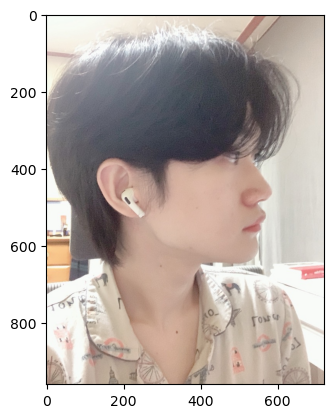

In [278]:
img_show("image/me_side_half.jpg")

### 두 눈을 가렸을 때

In [279]:
sticker("image/me_blind.jpg")

얼굴 탐지 실패


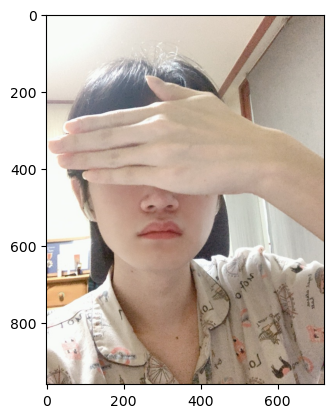

In [281]:
img_show("image/me_blind.jpg")

## 결론 및 회고

얼굴탐지는 잘 하지만 **추론능력은 부족**한 것으로 생각된다.  
high angle에서 얼굴은 탐지하지 못하여 아예 추론능력이 없을 줄 알았는데, 눈을 가려도 눈으로 탐지한 것은 의외였다.  
정면에서 눈, 코, 입이 보여야 얼굴을 탐지 할 수 있고, 눈 하나 가려지는 것 정도는 괜찮은 것으로 보인다. 

원리와 코드는 간단한거 같은데 여러 좌표를 사용하다보니까 헷갈리는게 조금 어려웠던거 같다.  
그리고 왕관 png에서는 빈 부분이 0, 즉 검정색이었는데, 고양이 png에서는 빈 부분이 255, 흰색으로 다르게 구성되어 있는 것도 의아했다. 

### 추가실습 - 얼굴 이외의 배경 제거

구현 실패

In [17]:
def remove_background(image_path):
    # 이미지 불러오기
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # 얼굴을 찾기위한 detector를 선언
    detector_hog = dlib.get_frontal_face_detector()
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)  # (image, num of image pyramid)
    if not dlib_rects:
        print("얼굴 탐지 실패")
        return

    # 랜드마크 찾기
    model_path = "model/shape_predictor_68_face_landmarks.dat"
    landmark_predictor = dlib.shape_predictor(model_path)
    list_landmarks = []  # 랜드마크의 위치를 저장할 list 생성

    # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
    # face landmark 좌표를 저장해둡니다
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        list_landmarks.append(list_points)

        # 얼굴 부분을 흰색으로 채우기
        mask = np.zeros_like(dlib_rects)
        cv2.fillPoly(mask, [np.array(list_landmarks)], (255, 255, 255))

        # 얼굴 이외의 부분을 흰색으로 채우기
        mask_inv = cv2.bitwise_not(mask)
        result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_inv)

        # 흰색 배경 이미지 생성
        white_bg = np.ones_like(img_rgb) * 255

        # 얼굴 영역을 흰색 배경에 합성
        result = cv2.bitwise_or(result, white_bg, mask=mask)
    plt.imshow(
        cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    )  # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
    plt.show()

In [18]:
remove_background("image/me.jpg")

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'fillPoly'
> Overload resolution failed:
>  - img data type = object is not supported
>  - Expected Ptr<cv::UMat> for argument 'img'


### 재현님이 공유해주신 캠으로 돌리는 코드

In [4]:
import cv2
import dlib
import numpy as np

# 얼굴 검출기와 랜드마크 검출기 초기화
detector = dlib.get_frontal_face_detector()
# dlib에서 제공하는 pre-trained 모델
predictor = dlib.shape_predictor("model/shape_predictor_68_face_landmarks.dat")

# 합성할 이미지 로드
overlay_image = cv2.imread("image/crown.png", cv2.IMREAD_UNCHANGED)


def add_overlay(frame, overlay, position, angle):
    x, y, w, h = position
    overlay = cv2.resize(overlay, (w, h))

    # 알파 채널 분리
    alpha_s = overlay[:, :, 3] / 255.0
    alpha_l = 1.0 - alpha_s

    # 이미지 회전
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_overlay = cv2.warpAffine(
        overlay,
        M,
        (w, h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(0, 0, 0, 0),
    )

    for c in range(0, 3):
        frame[y : y + h, x : x + w, c] = (
            alpha_s * overlay[:, :, c] + alpha_l * frame[y : y + h, x : x + w, c]
        )

    return frame


# 얼굴의 각도 계산
def calculate_angle(landmarks):
    left_eye_center = np.mean(
        [
            (landmarks.part(36).x, landmarks.part(36).y),
            (landmarks.part(39).x, landmarks.part(39).y),
        ],
        axis=0,
    )
    right_eye_center = np.mean(
        [
            (landmarks.part(42).x, landmarks.part(42).y),
            (landmarks.part(45).x, landmarks.part(45).y),
        ],
        axis=0,
    )
    delta_x = right_eye_center[0] - left_eye_center[0]
    delta_y = right_eye_center[1] - left_eye_center[1]
    angle = np.degrees(np.arctan2(delta_y, delta_x))
    return angle


# 비디오 캡처 초기화
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 그레이스케일로 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)
        left = (landmarks.part(0).x, landmarks.part(0).y)
        right = (landmarks.part(16).x, landmarks.part(16).y)
        top = (landmarks.part(19).x, landmarks.part(19).y)
        bottom = (landmarks.part(8).x, landmarks.part(8).y)

        width = right[0] - left[0]
        height = bottom[1] - top[1]

        # 얼굴 위치에 합성 이미지 추가
        position = (left[0], top[1] - height // 2, width, height)

        # 얼굴 각도 계산
        angle = calculate_angle(landmarks)

        frame = add_overlay(frame, overlay_image, position, angle)

    cv2.imshow("Face Overlay", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()